In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
transaction_data=pd.read_csv('../dataset/transaction_data.csv')
demographic_data=pd.read_csv('../dataset/hh_demographic.csv')
product_data=pd.read_csv("../dataset/product.csv")

In [3]:
def draw_missing_data_table(df):
    missing_count = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([missing_count, missing_percent], axis=1, keys=['Missing Count', 'Missing %'])
    return missing_data

In [4]:
transaction_data.nunique()

household_key          2500
BASKET_ID            276484
DAY                     711
PRODUCT_ID            92339
QUANTITY              11746
SALES_VALUE            5502
STORE_ID                582
RETAIL_DISC            2414
TRANS_TIME             1440
WEEK_NO                 102
COUPON_DISC             415
COUPON_MATCH_DISC        80
dtype: int64

In [5]:
transaction_data=transaction_data[['household_key','BASKET_ID','DAY','PRODUCT_ID','QUANTITY','SALES_VALUE','WEEK_NO']]

In [6]:
age_map={'19-24':0,'25-34':1,'35-44':2,'45-54':3,'55-64':4,'65+':5}
demographic_data.AGE_DESC=demographic_data.AGE_DESC.map(age_map)

In [7]:
income_map={'Under 15K':0,'15-24K':1,'25-34K':2,'35-49K':3,'50-74K':4,'75-99K':5,'100-124K':6,'125-149K':7,'150-174K':8,'175-199K':9,'200-249K':10,'250K+':11}
demographic_data.INCOME_DESC=demographic_data.INCOME_DESC.map(income_map)

In [8]:
demographic_data.HOMEOWNER_DESC=demographic_data.HOMEOWNER_DESC.astype('string')

In [9]:
marital_status_map={'A':'Married','B':'Single','U':'Unknown'}
demographic_data.MARITAL_STATUS_CODE=demographic_data.MARITAL_STATUS_CODE.map(marital_status_map)
demographic_data.MARITAL_STATUS_CODE=demographic_data.MARITAL_STATUS_CODE.astype('string')

In [10]:
demographic_data['AGE_GROUP']=demographic_data.AGE_DESC
demographic_data['INCOME_GROUP']=demographic_data.INCOME_DESC

In [11]:
demographic_data=demographic_data[['household_key','AGE_GROUP', 'MARITAL_STATUS_CODE', 'INCOME_GROUP', 'HOMEOWNER_DESC', 'HOUSEHOLD_SIZE_DESC','KID_CATEGORY_DESC']]

In [12]:
demographic_data.dtypes

household_key           int64
AGE_GROUP               int64
MARITAL_STATUS_CODE    string
INCOME_GROUP            int64
HOMEOWNER_DESC         string
HOUSEHOLD_SIZE_DESC    object
KID_CATEGORY_DESC      object
dtype: object

In [13]:
values=transaction_data.household_key.sort_values()
household_keys=set(values.tolist())

# Many Household keys missing in the demografic data!!!
## Skipping of for now but need to definitly look at it later point of time.  

In [14]:
product_data.dtypes

PRODUCT_ID               int64
MANUFACTURER             int64
DEPARTMENT              object
BRAND                   object
COMMODITY_DESC          object
SUB_COMMODITY_DESC      object
CURR_SIZE_OF_PRODUCT    object
dtype: object

In [15]:
product_data.BRAND=product_data.BRAND.astype('string')

In [16]:
department_map={
    'GROCERY':'GROCERY',
    'DRUG GM':'DRUG GM',
    'PRODUCE':'PRODUCE',
    'COSMETICS':'COSMETICS',
    'NUTRITION':'NUTRITION',
    'MEAT':'MEAT',
    'MEAT-PCKGD':'MEAT-PCKGD',
    'DELI':'DELI',
    'PASTRY':'PASTRY',
    'FLORAL':'FLORAL',
    'SEAFOOD-PCKGD':'SEAFOOD-PCKGD',
    'MISC. TRANS.':'MISC. TRANS.',
    'SPIRITS':'SPIRITS',
    'SEAFOOD':'SEAFOOD',
    'GARDEN CENTER':'GARDEN CENTER',
    'RESTAURANT':'RESTAURANT',
    'TRAVEL & LEISUR':'TRAVEL & LEISUR',
    'RX':'OTHERS',
    'TOYS':'OTHERS',
    'POSTAL CENTER':'OTHERS',
    'PHOTO':'OTHERS',
    'KIOSK-GAS':'OTHERS',
    '':'OTHERS',
    'HBC':'OTHERS',
    'COUP/STR & MFG':'OTHERS',
    'FROZEN GROCERY':'GROCERY',
    'CHEF SHOPPE':'RESTAURANT',
    'CNTRL/STORE SUP':'OTHERS',
    'GM MERCH EXP':'OTHERS',
    'HOUSEWARES':'OTHERS',
    'AUTOMOTIVE':'OTHERS',
    'ELECT &PLUMBING':'OTHERS',
    'MISC SALES TRAN':'MISC. TRANS.',
    'CHARITABLE CONT':'MISC. TRANS.',
    'PROD-WHS SALES':'PRODUCE',
    'DELI/SNACK BAR':'DELI',
    'GRO BAKERY':'GROCERY',
    'DAIRY DELI':'DELI',
    'PORK':'MEAT',
    'MEAT-WHSE':'MEAT-PCKGD',
    'SALAD BAR':'PRODUCE',
    'VIDEO RENTAL':'ENTERTAINMENT',
    'VIDEO':'ENTERTAINMENT',
    'PHARMACY SUPPLY':'DRUG GM'
}

In [17]:
product_data.DEPARTMENT=product_data.DEPARTMENT.map(department_map)

In [18]:
product_data.DEPARTMENT=product_data.DEPARTMENT.fillna("OTHERS")

In [19]:
product_data=product_data.drop(['CURR_SIZE_OF_PRODUCT'],axis=1)

In [20]:
total_data=pd.merge(transaction_data,product_data,on=('PRODUCT_ID'))
#total_data=transaction_data.set_index('PRODUCT_ID').join(product_data.set_index('PRODUCT_ID'))

In [21]:
total_data

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,WEEK_NO,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC
0,2375,26984851472,1,1004906,1,1.39,1,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG)
1,1929,27021022215,4,1004906,1,1.39,1,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG)
2,568,27021090189,4,1004906,1,1.39,1,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG)
3,887,27031467254,5,1004906,1,1.39,1,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG)
4,175,27057508267,7,1004906,1,1.99,2,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG)
...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,1598,42305362535,711,92130,1,0.99,102,560,GROCERY,National,MARGARINES,MARGARINE: TUBS AND BOWLS
2595728,1598,42305362535,711,114102,1,8.89,102,2398,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS
2595729,1598,42305362535,711,133449,1,6.99,102,2468,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS
2595730,1598,42305362535,711,6923644,1,4.50,102,2390,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS


In [22]:
draw_missing_data_table(total_data)

,Missing Count,Missing %
SUB_COMMODITY_DESC,0,0.0
COMMODITY_DESC,0,0.0
BRAND,0,0.0
DEPARTMENT,0,0.0
MANUFACTURER,0,0.0
WEEK_NO,0,0.0
SALES_VALUE,0,0.0
QUANTITY,0,0.0
PRODUCT_ID,0,0.0
DAY,0,0.0


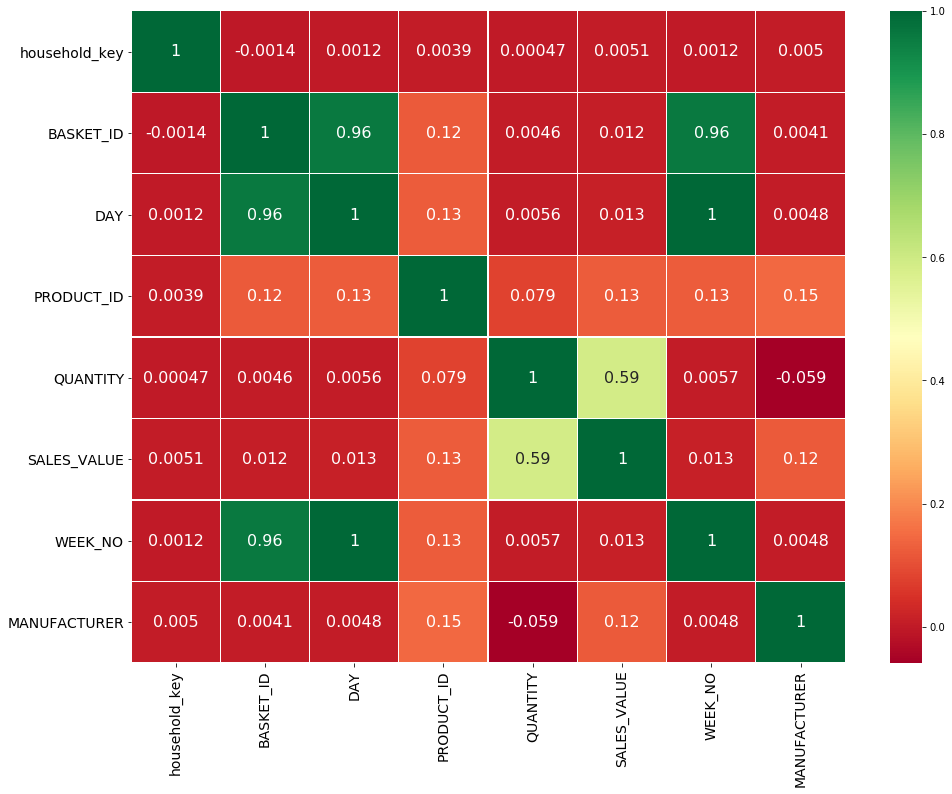

In [23]:
sns.heatmap(total_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':16})
fig=plt.gcf()
fig.set_size_inches(16,12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [24]:
total_data

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,WEEK_NO,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC
0,2375,26984851472,1,1004906,1,1.39,1,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG)
1,1929,27021022215,4,1004906,1,1.39,1,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG)
2,568,27021090189,4,1004906,1,1.39,1,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG)
3,887,27031467254,5,1004906,1,1.39,1,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG)
4,175,27057508267,7,1004906,1,1.99,2,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG)
...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,1598,42305362535,711,92130,1,0.99,102,560,GROCERY,National,MARGARINES,MARGARINE: TUBS AND BOWLS
2595728,1598,42305362535,711,114102,1,8.89,102,2398,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS
2595729,1598,42305362535,711,133449,1,6.99,102,2468,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS
2595730,1598,42305362535,711,6923644,1,4.50,102,2390,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS


In [25]:
total_data_demographic=pd.merge(demographic_data,total_data,on=('household_key'))

In [26]:
total_data_demographic.columns

Index(['household_key', 'AGE_GROUP', 'MARITAL_STATUS_CODE', 'INCOME_GROUP',
       'HOMEOWNER_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC',
       'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY', 'SALES_VALUE', 'WEEK_NO',
       'MANUFACTURER', 'DEPARTMENT', 'BRAND', 'COMMODITY_DESC',
       'SUB_COMMODITY_DESC'],
      dtype='object')

In [27]:
total_data.columns

Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'WEEK_NO', 'MANUFACTURER', 'DEPARTMENT', 'BRAND',
       'COMMODITY_DESC', 'SUB_COMMODITY_DESC'],
      dtype='object')

In [28]:
draw_missing_data_table(total_data)

,Missing Count,Missing %
SUB_COMMODITY_DESC,0,0.0
COMMODITY_DESC,0,0.0
BRAND,0,0.0
DEPARTMENT,0,0.0
MANUFACTURER,0,0.0
WEEK_NO,0,0.0
SALES_VALUE,0,0.0
QUANTITY,0,0.0
PRODUCT_ID,0,0.0
DAY,0,0.0


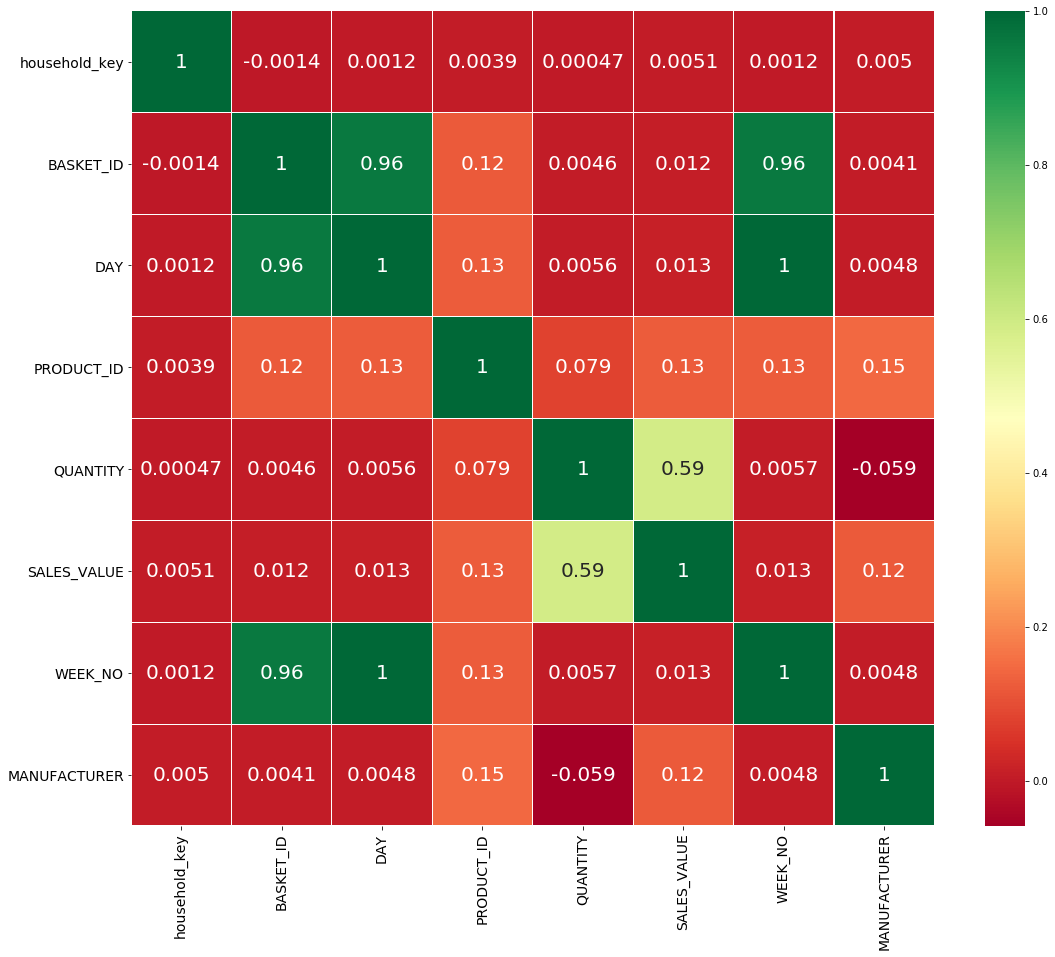

In [29]:
sns.heatmap(total_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [30]:
total_data.to_csv("total_data.csv")

In [31]:
total_data_demographic.to_csv("total_data_demographic.csv")